In [ ]:
import tensorflow as tf
import keras

In [ ]:
tf.__version__

'2.18.0'

In [ ]:
keras.__version__

'3.8.0'

In [12]:
%pwd

'/content'

In [ ]:
!unrar  x '/content/drive/MyDrive/OPEN CV/dogs-vs-cats.rar'

Streaming output truncated to the last 5000 lines.
Extracting  dogs-vs-cats/test1/55.jpg                                     86%  OK 
Extracting  dogs-vs-cats/test1/550.jpg                                    86%  OK 
Extracting  dogs-vs-cats/test1/5500.jpg                                   86%  OK 
Extracting  dogs-vs-cats/test1/5501.jpg                                   86%  OK 
Extracting  dogs-vs-cats/test1/5502.jpg                                   86%  OK 
Extracting  dogs-vs-cats/test1/5503.jpg                                   86%  OK 
Extracting  dogs-vs-cats/test1/5504.jpg                                   86%  OK 
Extracting  dogs-vs-cats/test1/5505.jpg                                   86%  OK 
Extracting  dogs-vs-cats/test1/5506.jpg                                   86%  OK 
Extracting  dogs-vs-cats/test1/5507.jpg                                   86%  OK 
Extracting  dogs-vs-cats/test

In [15]:
%cd //content/drive/MyDrive/OPEN CV/

/content/drive/MyDrive/OPEN CV


In [17]:
%ls

dogs-vs-cats.rar


In [20]:
!unrar  x '/content/drive/MyDrive/OPEN CV/dogs-vs-cats.rar'

Streaming output truncated to the last 5000 lines.
Extracting  dogs-vs-cats/test1/55.jpg                                     86%  OK 
Extracting  dogs-vs-cats/test1/550.jpg                                    86%  OK 
Extracting  dogs-vs-cats/test1/5500.jpg                                   86%  OK 
Extracting  dogs-vs-cats/test1/5501.jpg                                   86%  OK 
Extracting  dogs-vs-cats/test1/5502.jpg                                   86%  OK 
Extracting  dogs-vs-cats/test1/5503.jpg                                   86%  OK 
Extracting  dogs-vs-cats/test1/5504.jpg                                   86%  OK 
Extracting  dogs-vs-cats/test1/5505.jpg                                   86%  OK 
Extracting  dogs-vs-cats/test1/5506.jpg                                   86%  OK 
Extracting  dogs-vs-cats/test1/5507.jpg                                   86%  OK 
Extracting  dogs-vs-cats/test

In [34]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Lambda
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [35]:
image_size=[244,244]
train_path='train'
valid_path='validation'

In [40]:
#Downloaded pre trained model
vgg16=VGG16(input_shape=image_size+[3],weights='imagenet',include_top=False)

In [43]:
for layer in vgg16.layers:
  layer.trainable=False

In [44]:
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 244, 244, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 244, 244, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 244, 244, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 122, 122, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 122, 122, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 122, 122, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 61, 61, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 61, 61, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 61, 61, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 61, 61, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 30, 30, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [48]:
%pwd

'/content/drive/MyDrive/OPEN CV'

In [50]:
%cd /content/drive/MyDrive/OPEN CV/dogs-vs-cats

/content/drive/MyDrive/OPEN CV/dogs-vs-cats


In [51]:
ls


test1/  Train/


In [59]:
folder=glob('Train/*')
folder

['Train/CAT', 'Train/DOG']

In [61]:
#Adding our custom dense layers
model=Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(2,activation='softmax'))


In [63]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,137,986 (80.64 MB)

 Trainable params: 6,423,298 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [64]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [67]:
#image processing
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen=ImageDataGenerator(rescale=1./255)

In [86]:
#loading training  images
train_set=train_datagen.flow_from_directory(
    'Train',
    target_size=(244,244),
    batch_size=32,
    class_mode='categorical'
)

Found 25020 images belonging to 2 classes.


In [87]:
ls

test1/  Train/  validation/


In [91]:
test_set=test_datagen.flow_from_directory(
    'validation',
    target_size=(244,244),
    batch_size=32,
    class_mode='categorical'
)

Found 34 images belonging to 2 classes.


In [101]:
history=model.fit(train_set,validation_data=test_set,epochs=3,steps_per_epoch=len(train_set),validation_steps=len(test_set))

Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 467s 597ms/step - accuracy: 0.9528 - loss: 0.1129 - val_accuracy: 1.0000 - val_loss: 0.0271
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 489s 625ms/step - accuracy: 0.9597 - loss: 0.1004 - val_accuracy: 0.9706 - val_loss: 0.0988
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 478s 594ms/step - accuracy: 0.9594 - loss: 0.1010 - val_accuracy: 1.0000 - val_loss: 0.0040


In [102]:
history.history

{'accuracy': [0.9519984126091003, 0.9563549160957336, 0.9594724178314209],
 'loss': [0.11519644409418106, 0.1053861528635025, 0.10114401578903198],
 'val_accuracy': [1.0, 0.970588207244873, 1.0],
 'val_loss': [0.02714853733778, 0.09881297498941422, 0.00399389024823904]}

In [103]:
import matplotlib.pyplot as plt


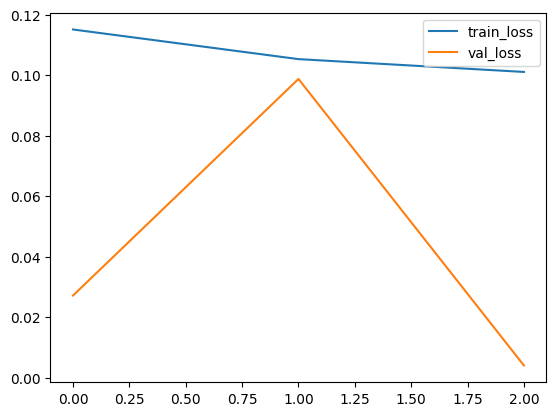

In [104]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [105]:
plt.savefig('loss graph')

<Figure size 640x480 with 0 Axes>

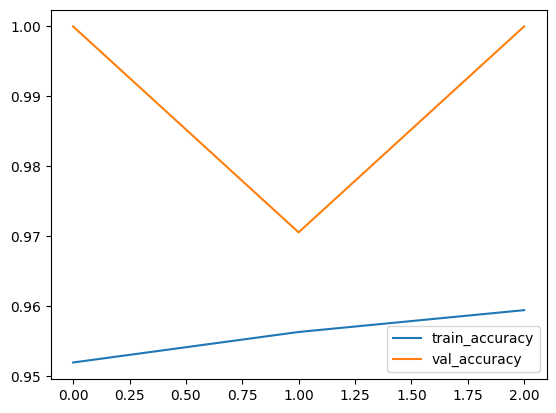

<Figure size 640x480 with 0 Axes>

In [106]:
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()
plt.savefig('accuracy graph')

In [118]:
#save the model
model.save('model_vgg16.h5')

In [119]:
#load model
from tensorflow.keras.models import load_model
model=load_model('model_vgg16.h5')

In [120]:
y_pred=model.predict(test_set)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


In [121]:
y_pred

array([[9.6280646e-01, 3.7193589e-02],
       [1.6551128e-06, 9.9999833e-01],
       [2.8834600e-04, 9.9971157e-01],
       [1.1611171e-02, 9.8838878e-01],
       [9.9999261e-01, 7.3551901e-06],
       [6.0296115e-03, 9.9397039e-01],
       [9.9995840e-01, 4.1658790e-05],
       [1.0000000e+00, 2.7323702e-14],
       [3.9748129e-04, 9.9960250e-01],
       [9.9999642e-01, 3.5224784e-06],
       [1.0000000e+00, 2.0420857e-12],
       [9.9999619e-01, 3.7720420e-06],
       [9.8908323e-01, 1.0916740e-02],
       [8.5121803e-03, 9.9148786e-01],
       [9.3276520e-10, 1.0000000e+00],
       [9.9999833e-01, 1.6376158e-06],
       [2.9372236e-08, 1.0000000e+00],
       [1.4769942e-11, 1.0000000e+00],
       [9.9311173e-01, 6.8882443e-03],
       [9.9911970e-01, 8.8025763e-04],
       [9.9996614e-01, 3.3843113e-05],
       [1.4119988e-03, 9.9858803e-01],
       [2.0180398e-05, 9.9997985e-01],
       [9.9994791e-01, 5.2052736e-05],
       [9.9677092e-01, 3.2290018e-03],
       [5.1245058e-04, 9.

In [122]:
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1])

In [123]:
pwd

'/content/drive/MyDrive/OPEN CV/dogs-vs-cats'

In [133]:
from tensorflow.keras.preprocessing import image


In [134]:
##loading the sample image
image_name ="/content/drive/MyDrive/OPEN CV/dogs-vs-cats/dog.jpeg"


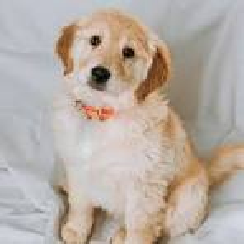

In [136]:
img=image.load_img(image_name,target_size=(244,244))
img

In [137]:

x=image.img_to_array(img)
x

array([[[189., 192., 199.],
        [189., 192., 199.],
        [190., 193., 200.],
        ...,
        [190., 190., 198.],
        [190., 190., 198.],
        [190., 190., 198.]],

       [[189., 192., 199.],
        [189., 192., 199.],
        [190., 193., 200.],
        ...,
        [190., 190., 198.],
        [190., 190., 198.],
        [190., 190., 198.]],

       [[189., 192., 199.],
        [189., 192., 199.],
        [190., 193., 200.],
        ...,
        [190., 190., 198.],
        [190., 190., 198.],
        [190., 190., 198.]],

       ...,

       [[199., 202., 209.],
        [199., 202., 209.],
        [198., 201., 208.],
        ...,
        [196., 199., 206.],
        [196., 199., 206.],
        [196., 199., 206.]],

       [[197., 200., 207.],
        [197., 200., 207.],
        [197., 200., 207.],
        ...,
        [194., 197., 204.],
        [194., 197., 204.],
        [194., 197., 204.]],

       [[197., 200., 207.],
        [197., 200., 207.],
        [197., 2

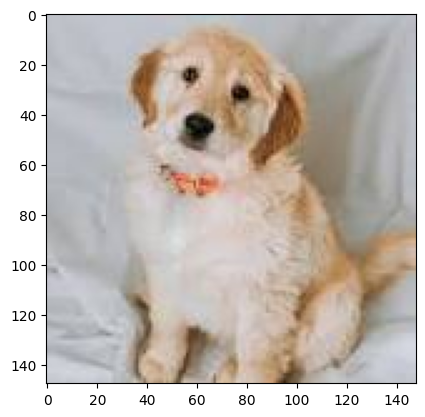

In [140]:
Z=plt.imread(image_name)
plt.imshow(Z)

In [141]:
x.shape

(244, 244, 3)

In [142]:
from keras.applications.vgg16 import preprocess_input

In [143]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 244, 244, 3)

In [144]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0., 1.]], dtype=float32)

In [145]:
result=np.argmax(model.predict(img_data),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [146]:
result

array([1])

In [147]:
if result=="0":
  print("The image classified is cat")

else:
  print("The image classified is dog")

The image classified is dog
